In [3]:
from fastquant import get_stock_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tweets = pd.read_csv('tweets.csv')

In [14]:
tweets.columns

Index(['Unnamed: 0', 'date', 'id', 'lang', 'probability', 'sentiment', 'text',
       'ticker'],
      dtype='object')

In [20]:
tweets.drop(columns=['Unnamed: 0'], inplace=True)

In [21]:
tweets

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
84633,2021-04-12,1.381489e+18,en,0.622162,POSITIVE,",Started with $5k, down to $1k……, back up to $...",pltr
84634,2021-04-12,1.381489e+18,en,0.999506,POSITIVE,$CTRM $ZOM $AAPL $SPY $PLTR $VXX $PRQR $CSCW $...,pltr
84635,2021-04-12,1.381489e+18,en,0.816165,NEGATIVE,Upcoming demo day of two new products of $PLTR,pltr
84636,2021-04-12,1.381489e+18,en,0.542999,NEGATIVE,"I am bracing for a red opening, especially for...",pltr


In [24]:
start_date = tweets.iloc[-1]['date']
end_date = tweets.iloc[0]['date']

In [27]:
tsla = tweets[tweets['ticker']=='tsla']

In [29]:
tsla_data = get_stock_data('tsla',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [30]:
tsla_data

,open,high,low,close,volume
dt,,,,,
2021-04-12,685.700012,704.799988,682.090027,701.979980,29135700
2021-04-13,712.700012,763.000000,710.659973,762.320007,44652800
2021-04-14,770.700012,780.789978,728.030029,732.229980,49017400
2021-04-15,743.099976,743.690002,721.309998,738.849976,27848900
2021-04-16,728.650024,749.409973,724.599976,739.780029,27924000


In [34]:
def data_prep(data):
    df = pd.DataFrame(data=None, columns=['fracChange'])
    df['fracChange'] = (data['close']-data['open'])/data['open']

    return df

In [32]:
def calc_avg_sentiment(df,date):
    subdf = tweets[tweets['date'] == date]
    sentiment = subdf['sentiment'].values
    avg_sentiment = sum([-1 if s == 'NEGATIVE' else 1 for s in sentiment])/len(sentiment)
    return avg_sentiment

In [35]:
tsla_frac_change = data_prep(tsla_data)

In [36]:
tsla_frac_change

,fracChange
dt,
2021-04-12,0.023742
2021-04-13,0.069623
2021-04-14,-0.049916
2021-04-15,-0.005719
2021-04-16,0.015275


In [39]:
dates = tsla['date'].unique()

In [41]:
avg_sent = []
for date in dates:
    avg_sent.append(calc_avg_sentiment(tsla,date))

In [42]:
avg_sent

[-0.048672566371681415,
 -0.032819074333800845,
 -0.008944195994555707,
 -0.046674537583628495,
 -0.061349224539689814,
 -0.0670908039329092,
 -0.11553369111508646,
 -0.05114812259781216]

In [43]:
dates

array(['2021-04-19', '2021-04-18', '2021-04-17', '2021-04-16',
       '2021-04-15', '2021-04-14', '2021-04-13', '2021-04-12'],
      dtype=object)

In [51]:
tsla_frac_change = tsla_frac_change[1:]

In [52]:
tsla_frac_change

,fracChange
dt,
2021-04-13,0.069623
2021-04-14,-0.049916
2021-04-15,-0.005719
2021-04-16,0.015275


In [57]:
avg_sent = list(reversed(avg_sent))

In [59]:
avg_sent = avg_sent[:4]

In [60]:
avg_sent

[-0.05114812259781216,
 -0.11553369111508646,
 -0.0670908039329092,
 -0.061349224539689814]

In [61]:
tsla_frac_change['avg_sent'] = avg_sent

In [62]:
tsla_frac_change

,fracChange,avg_sent
dt,,
2021-04-13,0.069623,-0.051148
2021-04-14,-0.049916,-0.115534
2021-04-15,-0.005719,-0.067091
2021-04-16,0.015275,-0.061349


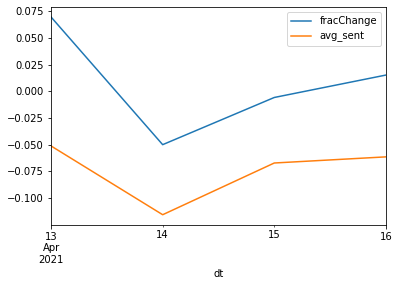

In [65]:
_ = tsla_frac_change.plot()

In [64]:
tsla

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
16241,2021-04-12,1.381483e+18,en,0.945080,NEGATIVE,RT Pick your basket? It's April 2026 which gr...,tsla
16242,2021-04-12,1.381483e+18,en,0.996286,NEGATIVE,RT This week there’s a slew of macro indicato...,tsla
16243,2021-04-12,1.381483e+18,en,0.999100,NEGATIVE,"Gamestop Corp. (GME), Square (SQ), Tesla Motor...",tsla
16244,2021-04-12,1.381483e+18,en,0.900235,NEGATIVE,RT Early in $FB (2007)\nEarly in (2011)\nEar...,tsla


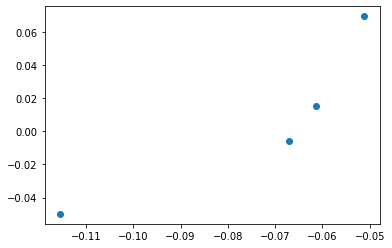

In [67]:
plt.scatter(x=tsla_frac_change['avg_sent'],y=tsla_frac_change['fracChange'])

In [91]:
def gen_data(df,ticker):
    ticker_data = tweets[tweets['ticker']==ticker]
    ticker_prices = get_stock_data(ticker,start_date,end_date)
    ticker_frac_change = data_prep(ticker_prices)
    dates = ticker_data['date'].unique()
    avg_sent = []
    for date in dates:
        avg_sent.append(calc_avg_sentiment(tsla,date))
    ticker_frac_change = ticker_frac_change[1:]
    avg_sent = list(reversed(avg_sent))
    avg_sent = avg_sent[:4]
    ticker_frac_change['avg_sent'] = avg_sent
    ticker_frac_change['ticker'] = ticker
    return ticker_frac_change

In [92]:
tickers = ['tsla', 'amzn', 'msft', 'aapl', 'gme', 'pltr']

In [96]:
data = pd.DataFrame(columns=['fracChange','avg_sent','ticker'])

In [97]:
for ticker in tickers:
    data = data.append(gen_data(tweets,ticker))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [98]:
data

,fracChange,avg_sent,ticker
2021-04-13,0.069623,-0.051148,tsla
2021-04-14,-0.049916,-0.115534,tsla
2021-04-15,-0.005719,-0.067091,tsla
2021-04-16,0.015275,-0.061349,tsla
2021-04-13,-0.000250,-0.051148,amzn
2021-04-14,-0.020869,-0.115534,amzn
2021-04-15,0.002400,-0.067091,amzn
2021-04-16,0.005751,-0.061349,amzn
2021-04-13,0.004781,-0.051148,msft
2021-04-14,-0.007340,-0.115534,msft


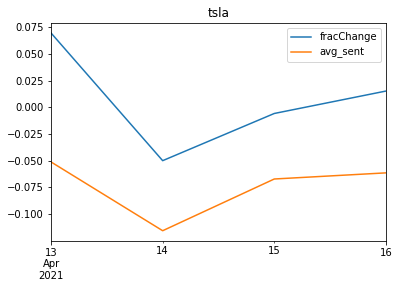

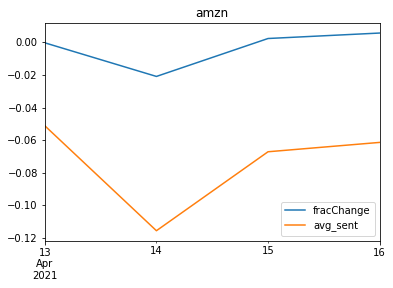

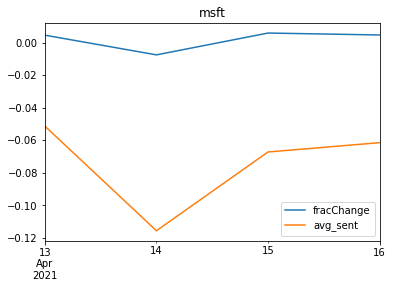

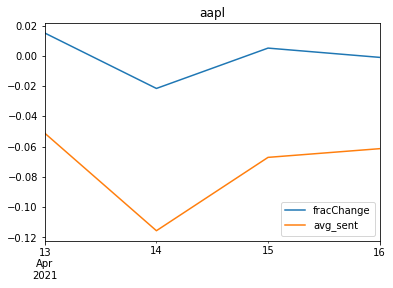

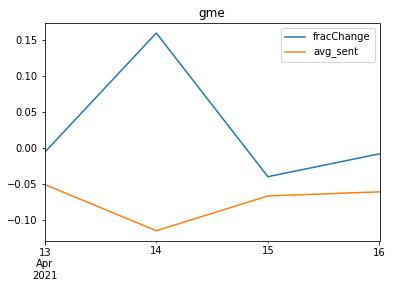

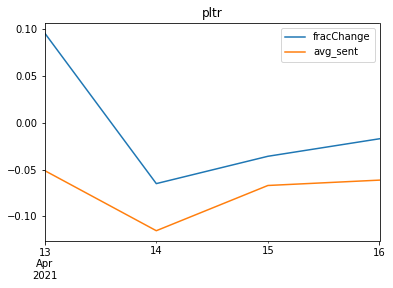

In [101]:
for ticker in tickers:
    _ = data[data['ticker']==ticker].plot(title=ticker)

In [144]:
lin_data = data[data['ticker'] != 'gme']
x = np.array(lin_data['avg_sent'])
y = np.array(lin_data['fracChange'])

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model = LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))

In [147]:
y_pred = model.predict(x.reshape(-1,1))

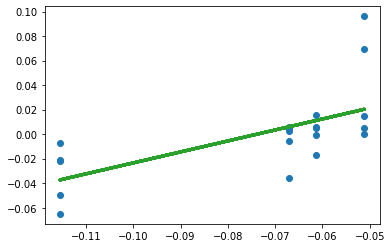

In [148]:
plt.scatter(x,y,c='tab:blue')
plt.plot(x,y_pred,c='tab:green',lw=3)